In [5]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = 'Mask_RCNN-master 3'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import Cell

In [6]:
import os
ROOT_DIR = 'Mask_RCNN-master 3'
assert os.path.exists(ROOT_DIR), 'ROOT_DIR does not exist. Did you forget to read the instructions above?'

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "../logs")

# Local path to trained weights file
#COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
#if not os.path.exists(COCO_MODEL_PATH):
#    utils.download_trained_weights(COCO_MODEL_PATH)

In [7]:
config = Cell.CellConfig()
#config.display()

In [8]:
dataset = Cell.HSYAADataset()
dataset.load_data("dataset/", "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
print(dataset.class_info)
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 50
Class Count: 3
[{'source': '', 'id': 0, 'name': 'BG'}, {'source': 'objects', 'id': 1, 'name': 'trap'}, {'source': 'objects', 'id': 2, 'name': 'cell'}]
  0. BG                                                
  1. trap                                              
  2. cell                                              


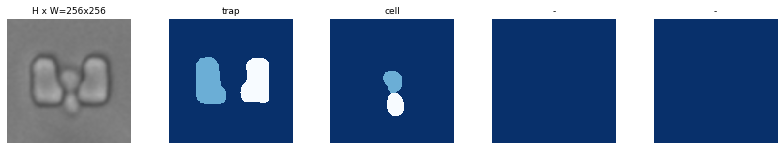

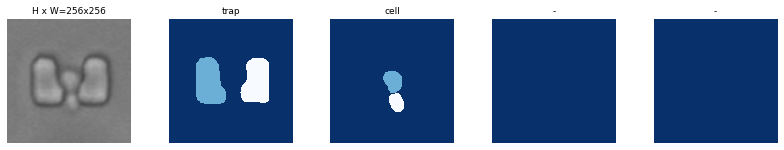

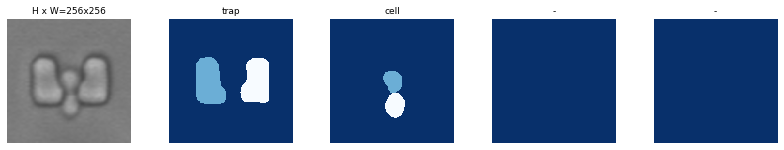

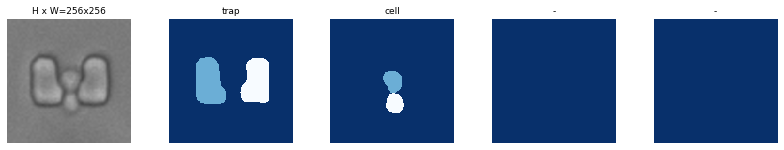

In [9]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image_id  35 dataset/train/036.png
image                    shape: (256, 256, 3)         min:   74.00000  max:  177.00000  uint8
mask                     shape: (256, 256, 4)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (4,)                  min:    1.00000  max:    2.00000  int64
bbox                     shape: (4, 4)                min:   54.00000  max:  207.00000  int32


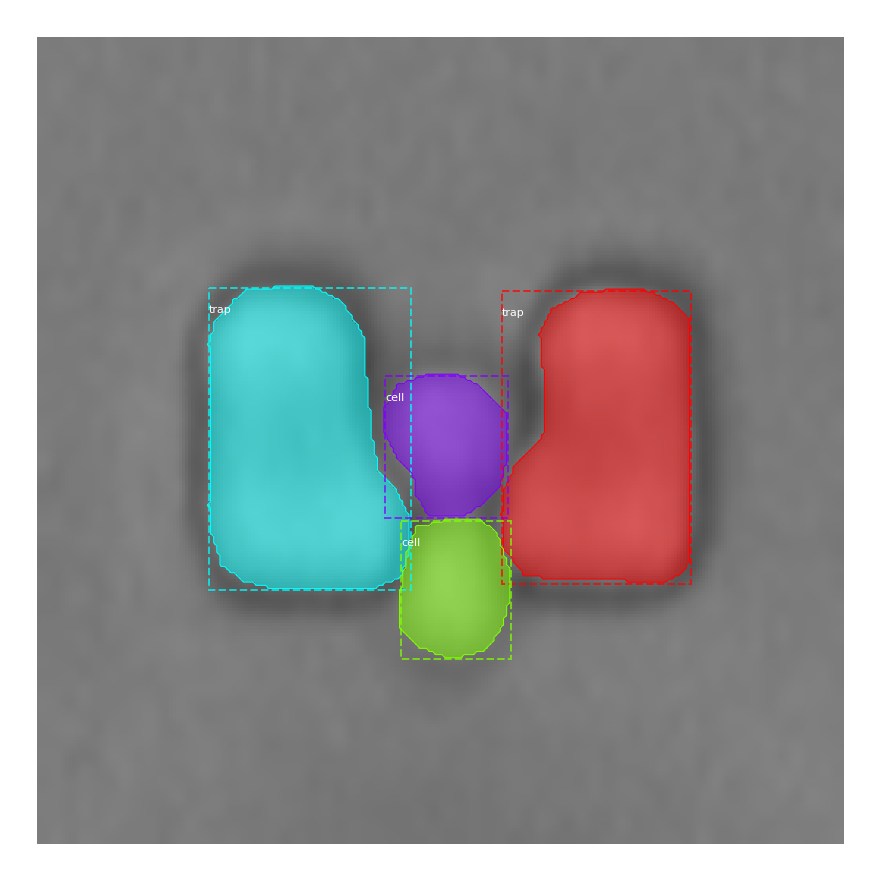

In [10]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)